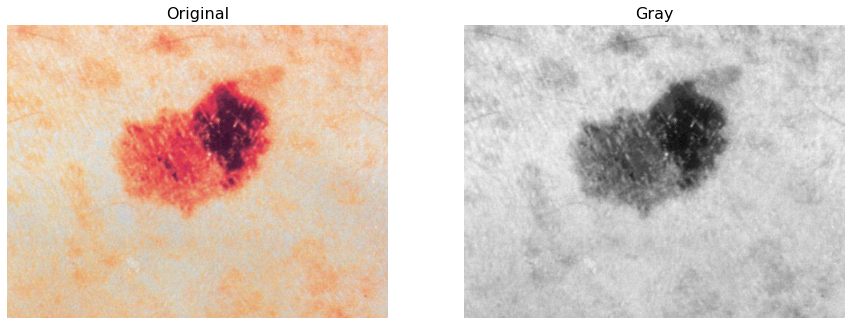

In [ ]:
# importing the modules needed
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Reading the image
image = mpimg.imread('skin.jpeg')

#We need to convert the color mode to grayscale to apply thresholding
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 15))

axs[0].imshow(image)
axs[0].axis('off')
axs[0].set_title('Original', fontsize=16)

axs[1].imshow(gray, cmap = 'gray')
axs[1].axis('off')
axs[1].set_title('Gray', fontsize=16)

plt.show(plt.xticks([]), plt.yticks([])) 



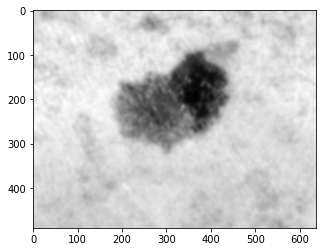

In [ ]:
#Blur
imgBlur=cv2.blur(dst, ksize=(7,7))
plt.imshow(imgBlur,cmap = 'gray')

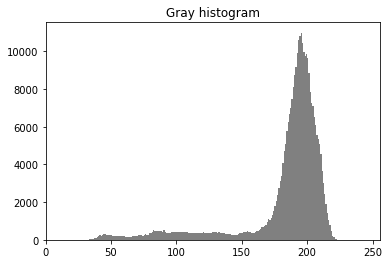

In [ ]:
#Compute and plot histogram of source image
hist,bins = np.histogram(imgBlur.flatten(),256,[0,256])
plt.title('Gray histogram')
plt.hist(imgBlur.flatten(),256,[0,256], color = 'gray')
plt.xlim([0,256])
plt.show()

min= 31
max= 228


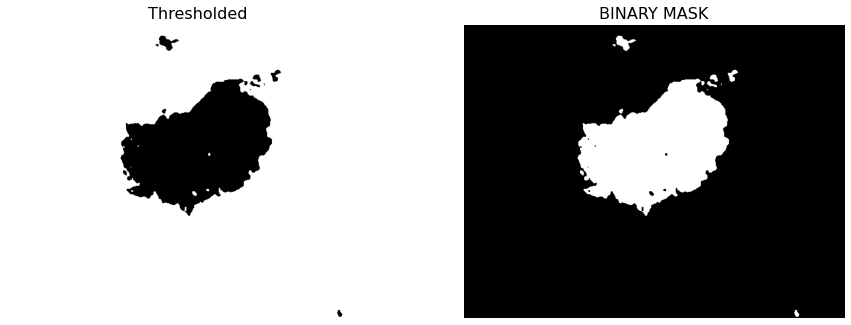

In [ ]:
# Thresholding with maxval=255
T=150
maxval=255
minvalue=np.min(dst)
maxvalue=np.max(dst)
print('min=',minvalue)
print('max=',maxvalue)
#simple binary thresholding
# if 𝚜𝚛𝚌(x,y)>T then dst(x,y)= maxval else dst(x,y)=0
th1,dst1 = cv2.threshold(dst,T,maxval,cv2.THRESH_BINARY)

#inverse of simple binary thresholding
# if 𝚜𝚛𝚌(x,y)>T then dst(x,y)=0 else dst(x,y)= maxval 
th2,dst2 = cv2.threshold(dst,T,maxval,cv2.THRESH_BINARY_INV)

fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 15))

axs[0].imshow(dst1,'gray')
axs[0].axis('off')
axs[0].set_title('Thresholded', fontsize=16)

axs[1].imshow(dst2,'gray')
axs[1].axis('off')
axs[1].set_title('BINARY MASK', fontsize=16)

plt.show(plt.xticks([]), plt.yticks([])) 


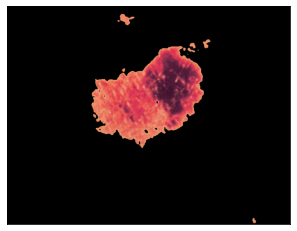

In [ ]:
final = cv2.bitwise_or(image, image, mask = dst2)

plt.imshow(final)
plt.show(plt.xticks([]), plt.yticks([])) 